<a href="https://colab.research.google.com/github/UniVR-DH/ADHLab/blob/main/lecture01_base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple example at parsing and cleaning a webpage

<img src="https://drive.google.com/uc?export=view&id=1m_EMdnI5C826kgqK7r5vB4TXnB0-Wq7W" alt="Intestazione con loghi istituzionali" width="525"/>

| Docente      | Insegnamento | Anno Accademico    |
| :---        |    :----   |          ---: |
| Matteo Lissandrini      | Laboratorio Avanzato di Informatica Umanistica       | 2024/2025   |


In [1]:
# import required libraries to download webpages, parse html, run regular expressions

import re   # regular expressions
import string # utilities to manipulate text
import requests    # download webpages
from bs4 import BeautifulSoup   # parse HTML content

In [2]:
# prompt: download the html code of a webpage with some text, extract the body, print the first 500characters

url = "https://www.bibliotecacapitolare.it/institutional/343/studia/"  # Replace with your desired URL

#url = "https://www.bibliotecacapitolare.it/institutional/395/regolamento-generale-per-le-visite/"  # Replace with your desired URL
response = requests.get(url)

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(response.content, "html.parser")

body = soup.body

if body:
  body_text = body.get_text()
  print(body_text[:500])  # Print the first 500 characters of the body
else:
  print("Something went wrong...")






BigliettiDonaStudiaOrganizzaOrganizza il tuo evento

															 EN
														




														 EN
													


BigliettiDonaStudiaOrganizza





Visita
Prenota la tua visitaPasseggiata con il PrefettoDidatticaStudia


Scopri
Eventi e NewsI tesori della CapitolareI luoghi e la storiaOrganizza il tuo evento privatoDigital library


Sostieni
DonaCorporate partnershipMembership5 x mille


La Fondazione
Chi siamoPiano strategicoPartecipaContatti



Visita

Prenota la tua visitaPass


In [3]:
# prepare a compiled regular expression to remove redundant whitespace and newlines from body_text

# Compile a regular expression to match redundant whitespace and newlines
whitespace_pattern = re.compile(r'\s+')

# Remove redundant whitespace and newlines using the compiled regex:
# reduntant whitespace are replaced by single space
cleaned_text = whitespace_pattern.sub(' ', body_text).strip()

print(cleaned_text[:500])  # Print the first 500 characters of the cleaned body

BigliettiDonaStudiaOrganizzaOrganizza il tuo evento EN EN BigliettiDonaStudiaOrganizza Visita Prenota la tua visitaPasseggiata con il PrefettoDidatticaStudia Scopri Eventi e NewsI tesori della CapitolareI luoghi e la storiaOrganizza il tuo evento privatoDigital library Sostieni DonaCorporate partnershipMembership5 x mille La Fondazione Chi siamoPiano strategicoPartecipaContatti Visita Prenota la tua visitaPasseggiata con il PrefettoDidatticaStudia Scopri Eventi e NewsI tesori della CapitolareI l


In [4]:
# Add a space before a capital letter in the middle of a word
# 'visitaPasseggiata' becomes  'visita Passeggiata'
capital_in_middle_pattern = re.compile(r'([a-z])([A-Z])')
modified_text = capital_in_middle_pattern.sub(r'\1 \2', cleaned_text)

print(modified_text[:500])

Biglietti Dona Studia Organizza Organizza il tuo evento EN EN Biglietti Dona Studia Organizza Visita Prenota la tua visita Passeggiata con il Prefetto Didattica Studia Scopri Eventi e News I tesori della Capitolare I luoghi e la storia Organizza il tuo evento privato Digital library Sostieni Dona Corporate partnership Membership5 x mille La Fondazione Chi siamo Piano strategico Partecipa Contatti Visita Prenota la tua visita Passeggiata con il Prefetto Didattica Studia Scopri Eventi e News I tes


In [5]:
# More about Regex:
# - https://en.wikipedia.org/wiki/Regular_expression
# - https://web.stanford.edu/~jurafsky/slp3/2.pdf
# - https://regexone.com/
punct_regex = re.compile('[{}]'.format(re.escape(string.punctuation))) # Regex matching any punctuation
space_regex = re.compile(' +') # Regex matching whitespace but not newlines

In [6]:
# extract word count from modified_text: create a dictionar of word frequencies

# Remove punctuation and convert to lowercase
modified_text = punct_regex.sub('', modified_text).lower()

# Split the text into words
words = space_regex.split(modified_text)

# Create a dictionary to store word frequencies
word_frequencies = {}

# Count the frequency of each word
for word in words:
    if word:  # Ignore empty strings
        if word not in word_frequencies:
            word_frequencies[word] = 1
        else:
            word_frequencies[word] += 1


num_words = len(words)

print("total words ", num_words)
print("total distinct words", len(word_frequencies))

total words  992
total distinct words 502


In [7]:
base_url = "https://www.bibliotecacapitolare.it"
links = []

for link in soup.find_all('a', href=True):
  href = link['href']
  if href.startswith('/') or href.startswith(base_url):
    if href.startswith('/'):
      href = base_url + href
    if base_url in href:
      links.append(href)

print(list(set(links)))

['https://www.bibliotecacapitolare.it/institutional/41439/partner/', 'https://www.bibliotecacapitolare.it/institutional/344/libreria-digitale/', 'https://www.bibliotecacapitolare.it/landing-user/?lan=it', 'https://www.bibliotecacapitolare.it/institutional/423/privacy-policy', 'https://www.bibliotecacapitolare.it/packages/?step=2', 'https://www.bibliotecacapitolare.it/institutional/347/soci/', 'https://www.bibliotecacapitolare.it/institutional/422/amministrazione-trasparente/?lan=it', 'https://www.bibliotecacapitolare.it/', 'https://www.bibliotecacapitolare.it/institutional/343/studia/', 'https://www.bibliotecacapitolare.it/institutional/388/5x1000/', 'https://www.bibliotecacapitolare.it/landing-campus/', 'https://www.bibliotecacapitolare.it/institutional/422/amministrazione-trasparente', 'https://www.bibliotecacapitolare.it/?step=1', 'https://www.bibliotecacapitolare.it/institutional/387/didattica/', 'https://www.bibliotecacapitolare.it/angels/?city=', 'https://www.bibliotecacapitolare

In [8]:
# return the top 20 most frequent words in word_frequencies
from collections import Counter

# Assuming word_frequencies is defined as in your code snippet
# (a dictionary mapping words to their frequencies)

# Create a counter object
# It is a collection where elements are stored as dictionary keys and their counts are stored as dictionary values.
words_counter  = Counter(word_frequencies)


# Get the top 20 most frequent words
top_words = words_counter.most_common(20)

top_words

[('e', 31),
 ('di', 26),
 ('la', 23),
 ('a', 21),
 ('per', 13),
 ('da', 13),
 ('il', 12),
 ('email', 11),
 ('è', 11),
 ('con', 10),
 ('i', 10),
 ('della', 10),
 ('capitolare', 9),
 ('dei', 9),
 ('sala', 9),
 ('al', 9),
 ('in', 8),
 ('password', 8),
 ('biblioteca', 7),
 ('del', 7)]

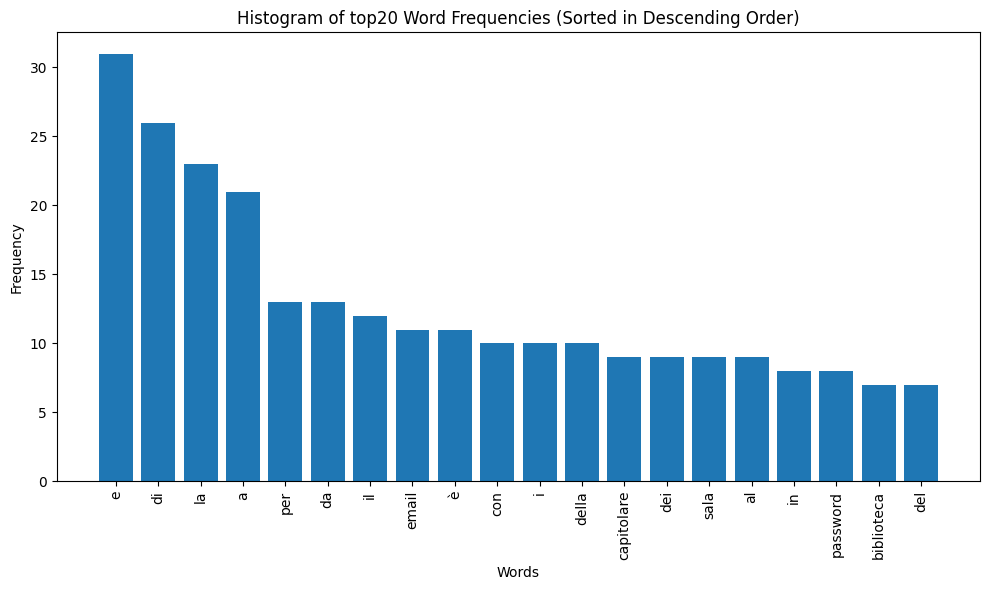

In [10]:
# plot histogram of word_frequencies sorted in descending order
import matplotlib.pyplot as plt


# Extract words and frequencies for the top 20 words
words = [ w for w,count in words_counter.most_common(20) ]
frequencies = [ count for w,count in words_counter.most_common(20) ]
# To obtain the values in the 0-1 range we can divide by num_words
# frequencies = [ count/num_words for w,count in words_counter.most_common(20) ]

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.bar(words[:20], frequencies[:20])
plt.xlabel('Words')
plt.ylabel('Frequency')
#plt.yscale('log', base=10)
plt.title('Histogram of top20 Word Frequencies (Sorted in Descending Order)')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [11]:
# function to compute the normlized frequency of element of rank k
# with zipfian law over N elements with parameter s

def zipfian_normalized_frequency(k, N, s):
  """
  Computes the normalized frequency of the element of rank k
  following Zipf's law over N elements with parameter s.

  Args:
    k: The rank of the element (1 for the most frequent).
    N: The total number of elements.
    s: The Zipfian parameter (s > 1).

  Returns:
    The normalized frequency of the element of rank k.
  """
  if k <= 0 or k > N or s <= 0:
    return 0  # Invalid input

  frequency = 1 / (k ** s)
  normalized_frequency = frequency / sum(1 / (i ** s) for i in range(1, N + 1))
  return normalized_frequency

print(zipfian_normalized_frequency(1, num_words, 1))
print(zipfian_normalized_frequency(2, num_words, 1))
print(zipfian_normalized_frequency(3, num_words, 1))

print(zipfian_normalized_frequency(1, num_words, 3))
print(zipfian_normalized_frequency(2, num_words, 3))
print(zipfian_normalized_frequency(3, num_words, 3))


0.1337355614048592
0.0668677807024296
0.0445785204682864
0.8319077238652125
0.10398846548315156
0.030811397180193056


In [13]:
# function to compute, according to heap's law, the number estimated
# of distinct words in an instance text of size N with K and beta as parameters
from math import ceil
def heaps_law_estimate(N, K, beta):
  """
  Estimates the number of distinct words in a text of length N
  using Heap's Law with parameters K and beta.

  Args:
    N: The length of the text (number of words).
    K: Parameter K of Heap's Law.
    beta: Parameter beta of Heap's Law.

  Returns:
    The estimated number of distinct words.
  """
  return ceil(K * (N ** beta))  #round up


# Example usage:
N = num_words  # Replace with the actual number of words in your text
K = 10  # Example value for K (adjust as needed)
beta = 0.65  # Example value for beta (adjust as needed)

estimated_distinct_words = heaps_law_estimate(N, K, beta)
print("Estimated number of distinct words:", estimated_distinct_words)

Estimated number of distinct words: 887
